# Ensemble

- 머신 러닝을 통한 데이터 분석 결과물을 더 신뢰할 수 있게 만들기 위한 기법
- 다양한 모델의 예측을 결합하여 최종 예측을 향상시키는 방법임
- 개별 모델의 약점을 상쇄하고 강점을 결합하여 일반화 성능을 높이는 데 유리함

## 주요 앙상블 기법

- Bagging
  - 여러 개의 모델을 병렬로 학습시켜 예측 결과를 평균 내거나, 다수결로 최종 결과를 결정
  - 예시: 랜덤 포레스트
- Boosting
  - 모델을 순차적으로 학습시키면서 이전 모델이 잘못 예측한 샘플에 더 큰 가중치를 부여하는 방식으로 성능을 개선시킴
   - 예시: AdaBoost, Gradient Boosting, XGBoost
- Stacking
  - 여러 개의 기본 학습기의 예측 결과를 메타 학습기에 입력으로 사용하여 최종 예측을 수행
  - 일반적으로 각기 다른 알고리즘을 사용하는 모델을 조합함
- Voting
  - 여러 모델의 예측 결과를 투표로 결합.
  - Hard Voting: 다수결 투표
  - Soft Voting: 예측 확률을 평균내여 결합

위 앙상블 기법은 딥 러닝 모델을 훈련할정도로 충분히 많지 않은 데이터를 대상으로 사용할 때 효과가 좋으며, scikit-learning 패키지를 사용하여 실습할 수 있음

- 주로 Kaggle tabular dataset에 효과적

## 이미지 분류 모델의 앙상블 기법

- Voting
  - 여러 모델의 예측 결과를 사용하여 다수결 혹은 예측 확률을 평균낸 값으로 분류 결과를 선택
- Stacking
  - VGG19, ResNet18 등 다양한 모델의 예측 결과를 간단한 MLP와 같은 메타 모델에 입력으로 사용하여 최종 예측을 수행

## 객체 인식 모델의 앙상블 기법

- Non-Maximum Suppresion (NMS) Ensemble
  - 여러 모델의 예측 결과 박스를 병합하여 겹치는 박스를 제거하고 최종 예측을 결정
- Weighted Boxes Fusion (WBF)
  - 예측 박스의 좌표와 신뢰도를 고려하여 더 정밀한 최종 박스를 생성

## 실습

In [1]:
!wget https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png

--2025-07-28 06:07:19--  https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 830401 (811K) [image/png]
Saving to: ‘image_01.png’

image_01.png        100%[===================>] 810.94K  --.-KB/s    in 0.007s  

2025-07-28 06:07:19 (111 MB/s) - ‘image_01.png’ saved [830401/830401]



Ultralytics에서 임의로 세 개의 모델을 사용하여 위에서 다운로드한 image_01.png의 이미지를 추론하고, WBF(Weighted Boxes Fusion) 기법을 활용하여 추론 결과를 앙상블하시오. 이후 WBF 결과를 각 이미지에 그려서 확인하시오.

- WBF 기법 git repo
  - https://github.com/ZFTurbo/Weighted-Boxes-Fusion

1. Ultralytics 환경 준비 및 임의 yolo 모델의 onnx 변환
2. onnx 추론 결과를 WBF 입력할 수 있는 형태로 변환
3. WBF를 이용한 앙상블 수행
4. 앙상블 결과를 이미지에 그리기

- WBF의 입력과 앙상블 결과를 그리는 코드 예시

```
import cv2
from ensemble_boxes import *
iou_thr = 0.5
skip_box_thr = 0.0001
weights=[1, 1, 1]
boxes, scores, labels = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
img = cv2.imread(ORIGINAL_IMAGE_PATH)
h, w = img.shape[:2]
## boxes는 WBF의 결과인 normalized xyxy로 가정
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = box
    x1, y1, x2, y2 = int(x1 * w), int(y1 * h), int(x2 * w), int(y2 * h)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"{label} {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
cv2.imwrite(BBOX_DRAW_IMAGE_PATH, img)
```

In [2]:
!pip install ultralytics onnx onnxruntime ensemble-boxes opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

In [4]:
from ultralytics import YOLO

models = [
    YOLO('yolov8n.pt'),
    YOLO('yolov8s.pt'),
    YOLO('yolov8m.pt')
]

onnx_paths = []
for i, model in enumerate(models):
    result = model.export(format='onnx', dynamic=True, imgsz=640, opset=12, simplify=True)
    onnx_path = result[0]  # ONNX 파일 경로
    onnx_paths.append(onnx_path)
    print(f"Model {i} exported to: {onnx_path}")


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 11.6s, saved as 'yolov8n.onnx' (12.1 MB)

Export complete (12.5s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n

In [10]:
import cv2
import numpy as np
import onnxruntime as ort
from ensemble_boxes import weighted_boxes_fusion
from matplotlib import pyplot as plt

img_path = "image_01.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (640, 640))
input_tensor = img_resized.transpose(2, 0, 1)[np.newaxis, :, :, :] / 255.0
input_tensor = input_tensor.astype(np.float32)

def run_onnx(onnx_path, input_tensor):
  sess = ort.InferenceSession(onnx_path)
  input_name = sess.get_inputs()[0].name
  output = sess.run(None, {input_name: input_tensor})[0]
  return output

In [11]:
def postprocess(output, conf_thresh=0.3):
  boxes, scores, labels = [], [], []
  for det in output[0]:
    if det[4] >= conf_thresh:
      x1, y1, x2, y2 = det[:4] / 640
      boxes.append([x1, y1, x2, y2])
      scores.append(det[4])
      labels.append(int(det[5]))
    return boxes, scores, labels

In [12]:
onnx_paths = ["yolov8n.onnx", "yolov8s.onnx", "yolov8m.onnx"]

boxes_list, scores_list, labels_list = [], [], []

for path in onnx_paths:
    output = run_onnx(path, input_tensor)
    b, s, l = postprocess(output)
    boxes_list.append(b)
    scores_list.append(s)
    labels_list.append(l)

# WBF 수행
fused_boxes, fused_scores, fused_labels = weighted_boxes_fusion(
    boxes_list, scores_list, labels_list,
    iou_thr=0.55, skip_box_thr=0.3
)


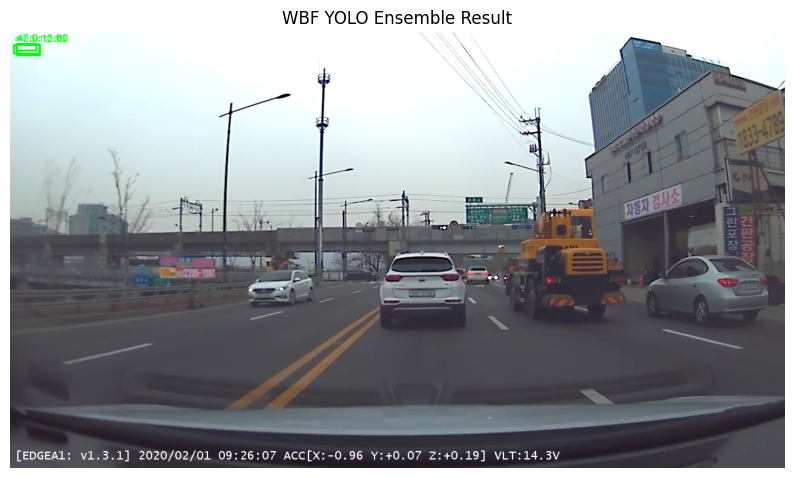

In [13]:
h, w = img_rgb.shape[:2]
for i in range(len(fused_boxes)):
    x1, y1, x2, y2 = fused_boxes[i]
    x1, y1, x2, y2 = int(x1*w), int(y1*h), int(x2*w), int(y2*h)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img_rgb, f"{fused_labels[i]}:{fused_scores[i]:.2f}", (x1, y1-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("WBF YOLO Ensemble Result")
plt.show()
